In [176]:
import pandas as pd
import requests
from bs4 import BeautifulSoup, Comment
import seaborn as sns

In [154]:
url = 'https://fbref.com/en/comps/9/stats/Premier-League-Stats#stats_standard'
#     table_class = 'stats_table sortable min_width now_sortable'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
# I noticed that tables 
table = BeautifulSoup(soup.select_one('#all_stats_standard').find_next(text=lambda x: isinstance(x, Comment)), 'html.parser')
df = pd.read_html(str(table))[0]

In [155]:
# some data cleaning

# remove multilevel columns
df.columns = df.columns.droplevel()

In [156]:
# Remove duplicated columns
df = df.loc[:,~df.columns.duplicated()]

In [157]:
# Remove columns that arent needed. 
df.drop(df.columns[[0,18,19,20,21,22,23,24,25]], inplace=True, axis = 1)

In [158]:
# Nation, , 
# Trim Nation to get last 3 digits
df['Nation'] = df['Nation'].str[-3:]
# df

In [159]:
# Position 
# SOme players have more than one position so I will take the first one
df['Pos'] = df['Pos'].str[:2]
# df

In [164]:
# Age
# Remain with only full age of player
# Drop Born year column
f['Age'] = df['Age'].str[:2]
df.drop(['Born'], inplace=True, axis = 1)

,Player,Nation,Pos,Squad,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
0,Patrick van Aanholt,NED,DF,Crystal Palace,30,18,17,1504,16.7,0,1,0,0,0,2,0
1,Tammy Abraham,ENG,FW,Chelsea,23,20,12,1021,11.3,6,1,6,0,0,0,0
2,Che Adams,ENG,FW,Southampton,24,28,24,2165,24.1,7,4,7,0,0,1,0
3,Tosin Adarabioyo,ENG,DF,Fulham,23,26,26,2340,26.0,0,0,0,0,0,1,0
4,Adrián,ESP,GK,Liverpool,34,3,3,270,3.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Andi Zeqiri,SUI,DF,Brighton,21,5,0,121,1.3,0,0,0,0,0,0,0
527,Oleksandr Zinchenko,UKR,DF,Manchester City,24,14,11,1083,12.0,0,0,0,0,0,0,0
528,Hakim Ziyech,MAR,FW,Chelsea,28,15,11,855,9.5,1,3,1,0,0,3,0
529,Kurt Zouma,FRA,DF,Chelsea,26,17,17,1530,17.0,4,0,4,0,0,1,0


In [ ]:
# I noticed there were 21 inique teams as opposed to 20,on checking there was a team named Squad which is the columns name. 
# drop repeated headers scrapped as rows
df.drop(df[df['Squad'] == 'Squad'].index, inplace = True)
# df[df['Squad'] == 'Squad']

In [ ]:
# From .describe I noticed there were duplicate players on checking its because players have played for more than one team this season
df[df['Player'].duplicated(keep=False)]

In [173]:
# change data types
df[['Age','MP','Starts','Min','Gls','Ast','G-PK','PK','PKatt','CrdY','CrdR']] = df[['Age','MP','Starts','Min','Gls','Ast','G-PK','PK','PKatt','CrdY','CrdR']].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

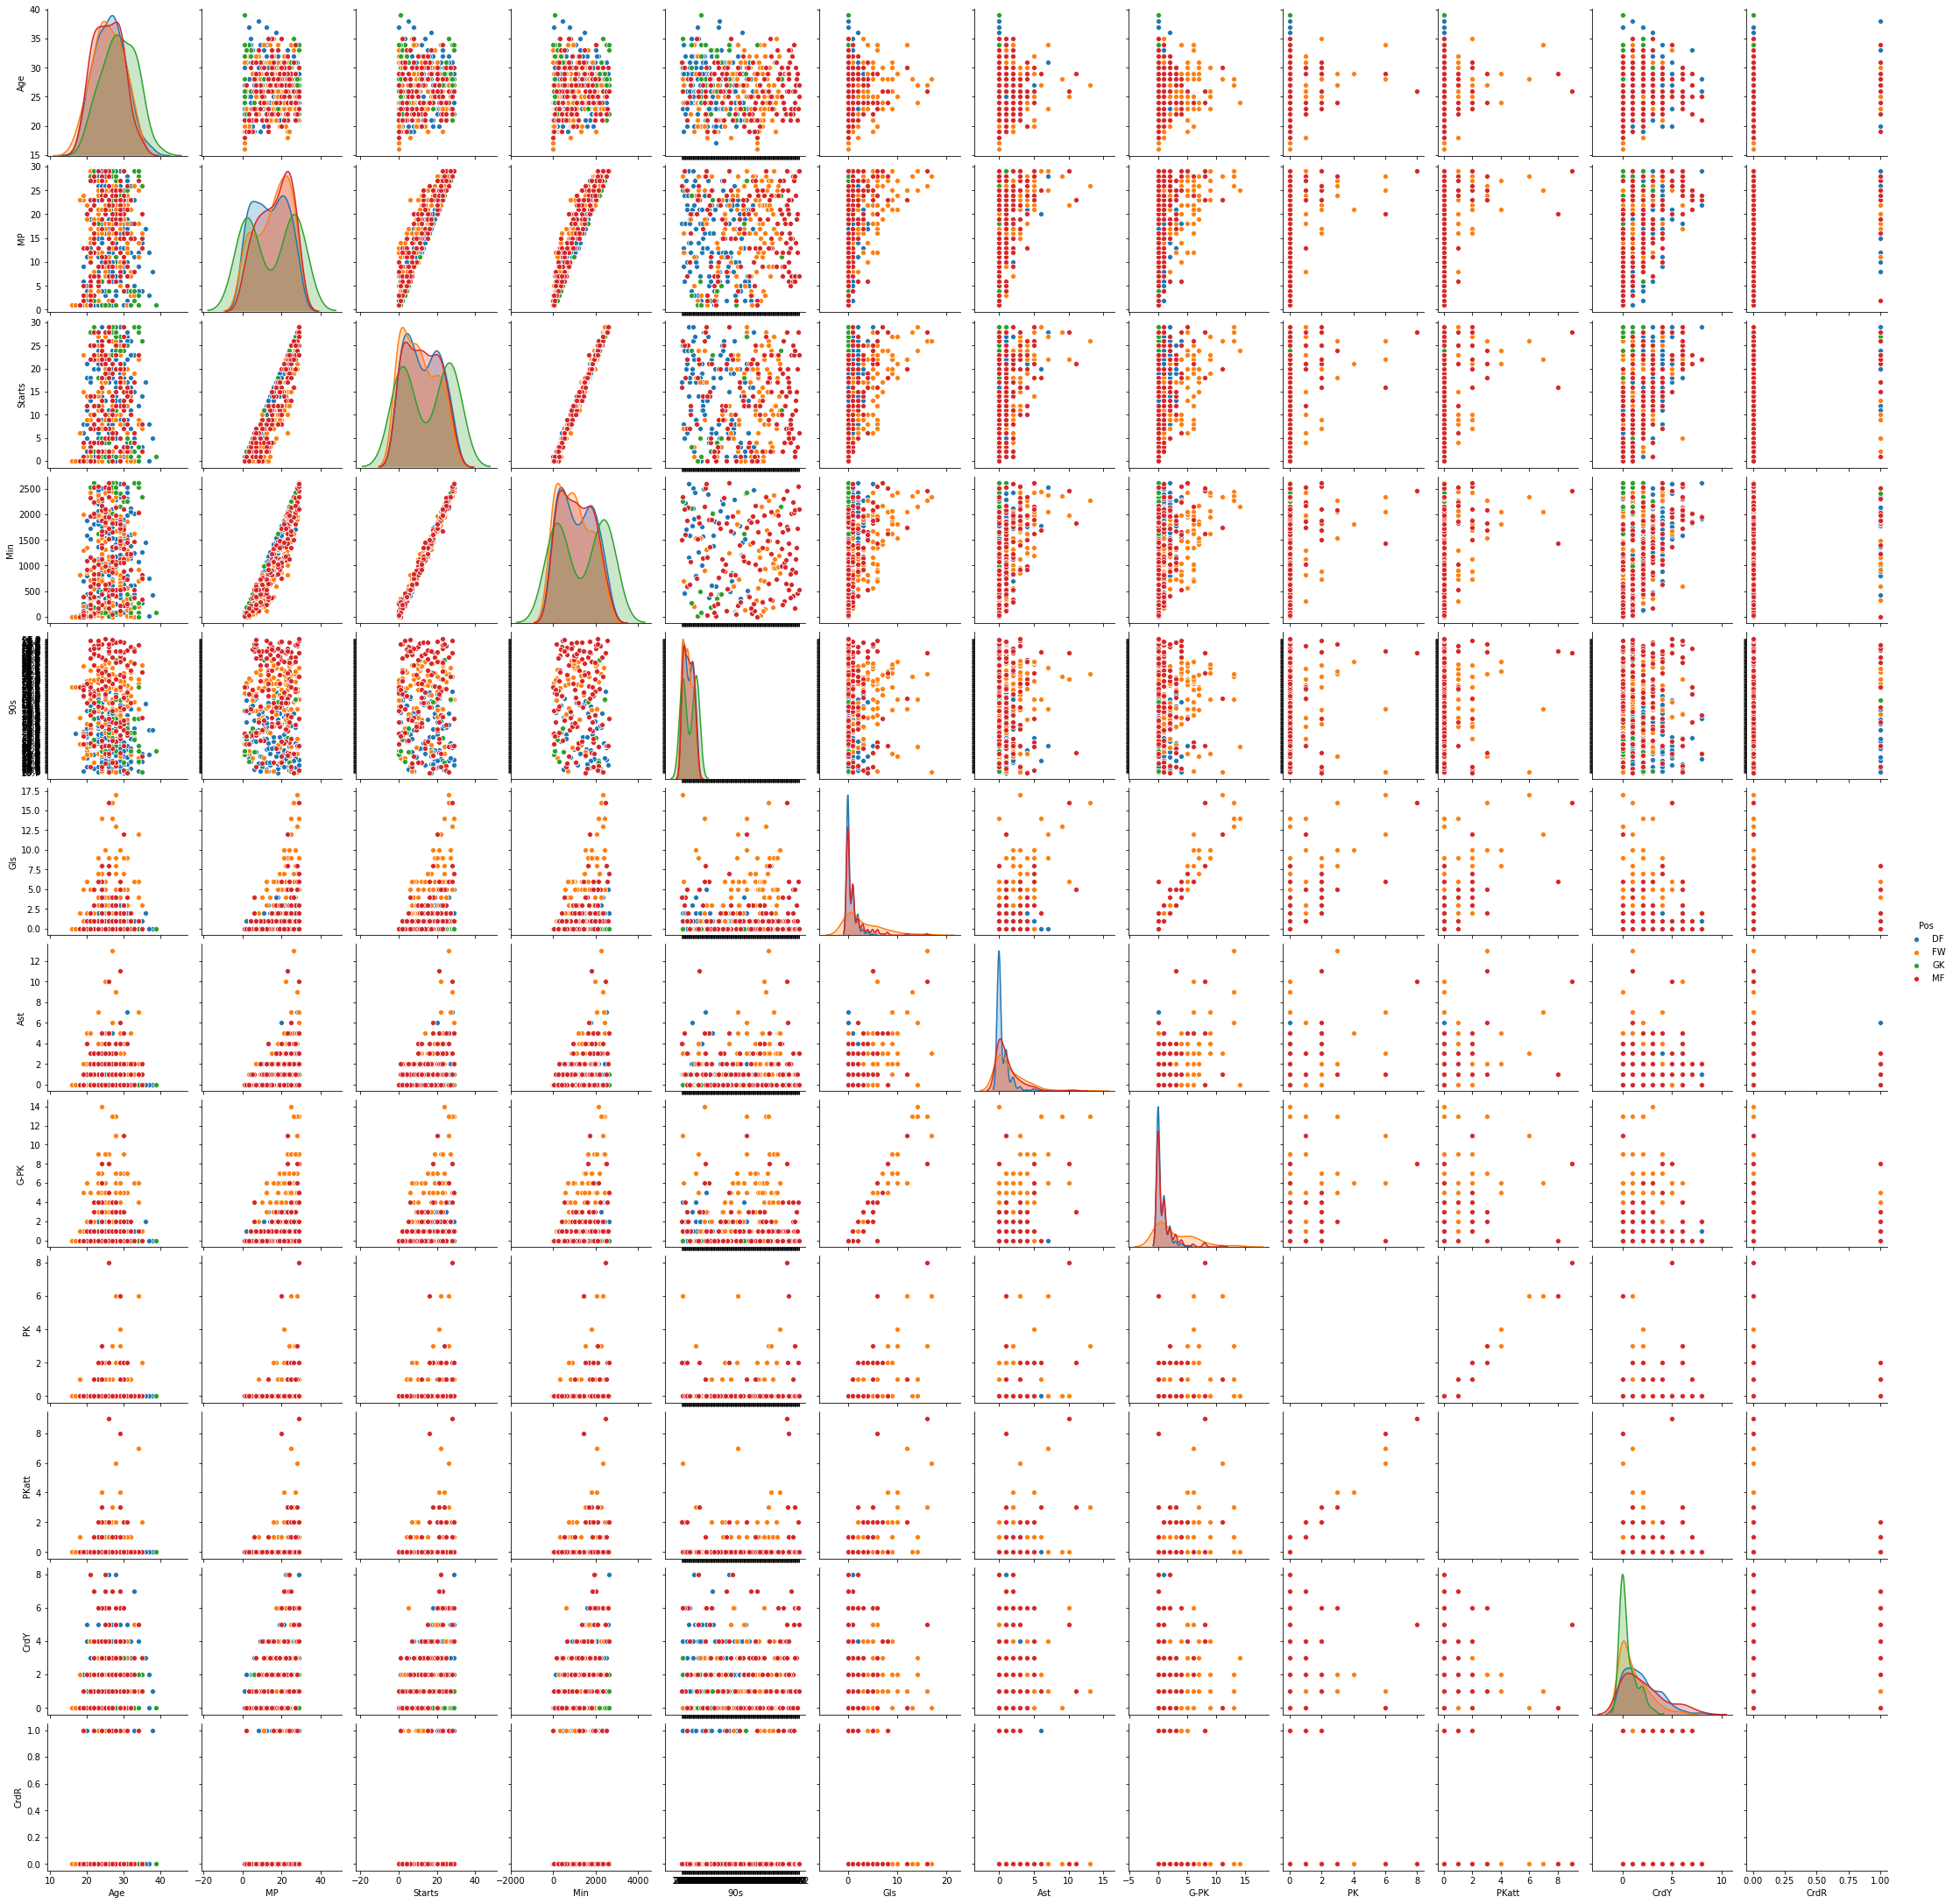

In [177]:
sns.pairplot(df, hue='Pos')

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
44,Ross Barkley,eng ENG,MF,Chelsea,27-106,1993,2,0,42,0.5,0,0,0,0,0,0,0
45,Ross Barkley,eng ENG,MF,Aston Villa,27-106,1993,17,14,1142,12.7,3,1,3,0,0,0,0
269,Ruben Loftus-Cheek,eng ENG,FW,Chelsea,25-057,1996,1,1,60,0.7,0,0,0,0,0,0,0
270,Ruben Loftus-Cheek,eng ENG,"MF,FW",Fulham,25-057,1996,24,19,1661,18.5,1,0,1,0,0,3,0
286,Ainsley Maitland-Niles,eng ENG,MF,West Brom,23-204,1997,7,7,630,7.0,0,0,0,0,0,1,0
287,Ainsley Maitland-Niles,eng ENG,DF,Arsenal,23-204,1997,11,5,490,5.4,0,0,0,0,0,0,0
320,Takumi Minamino,jp JPN,"MF,FW",Southampton,26-064,1995,6,5,410,4.6,2,0,2,0,0,0,0
321,Takumi Minamino,jp JPN,"MF,FW",Liverpool,26-064,1995,9,2,293,3.3,1,0,1,0,0,0,0
411,Mathew Ryan,au AUS,GK,Arsenal,28-347,1992,1,1,90,1.0,0,0,0,0,0,0,0
412,Mathew Ryan,au AUS,GK,Brighton,28-347,1992,11,11,990,11.0,0,0,0,0,0,1,0


'0    Osage Exploration and Development, Inc.\nName: Name, dtype: object'